# Exercise 7 -  Battery

To include a battery, perform the following steps:
Create a Battery class in a Battery.py file:
* Attributes:
````
class Battery:
    """a Simplistic Battery"""
    def __init__(self, kWh):
        self.capacity = kWh # kWh
        self.charge_power_max = 10 # kW
        self.discharge_power_max = 10 # kW
        self.charge_efficiency = 0.9
        self.discharge_efficiency = 0.9
        self.discharge_per_hour = 0.00012
        self.cost_kWh = 1000
        self.cost = self.capacity * self.cost_kWh
        self.current_charge = 0. #kWh
````
* Methods:
````
    def charge(self, kW):
        """
        takes a desired charge in kW (kWh for an hour), 
        calculates the accepted energy, change the current_charge of the Battery
        and returns the actually accepted energy
        """
        # ... add code
        return accepted_energy

    def discharge(self, kW:float):
        """
        takes a desired discharge in kW (kWh for an hour), 
        calculates the actual dischargebale energy, change the current_charge of the Battery
        and returns the actually discharged energy
        """
        # ... add code
        return discharged_energy * self.discharge_efficiency
````
Note that, this Battery has no sense of "time" it just stores it's current state and knows how to change it
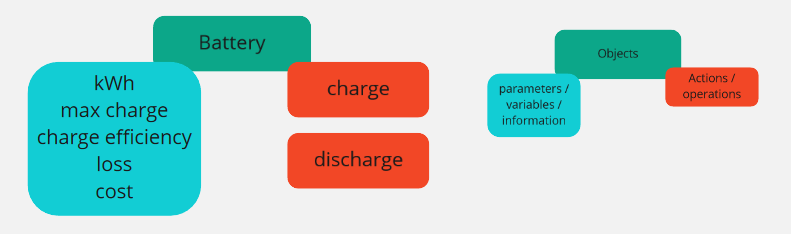

## Update Simulation Model
Next, update the Simulation Model to use the battery
* ``__init__()``: initialize the Model with a Battery and its default argument 
* ``init_sim()``: Add flows from PV to Battery (PV_to_battery) and Battery discharge (Btt_to_ED)
* add a Battery handling method:
````
    def handle_battery(self, t):
        #discharge losses
        remaining_ED = (self.ED[t] - self.PV_use[t]) * self.building.bgf / 1000 #kW not W/m²
        # define conditions, when to discharge battery for covering Electricity demand
        c1 = (is there actually ED remaining?)
        c2 = (is the battery charged?)
        if all conditions are true
            self.Btt_to_ED[t] = # discharge the battery
````
* update the ``self.handle_PV()`` method to store remaining Energy in the battery before feeding into the grid, if possible

## Test
You should be able to use the Model now like this:


In [5]:
from Simulation import Model
test = Model(kWp=50, battery_kWh=50)
test.battery.capacity

initializing Building object from ..\..\data\building_oib_16linie.xlsx


50

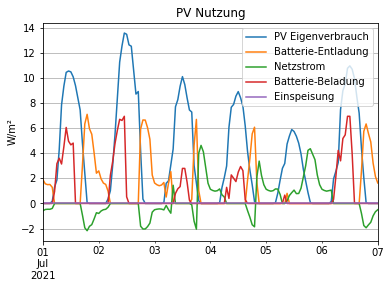

In [7]:
test.simulate()
test.plot_electricity_use(start="2021-07-01 00:00:00", end="2021-07-07 00:00:00") 

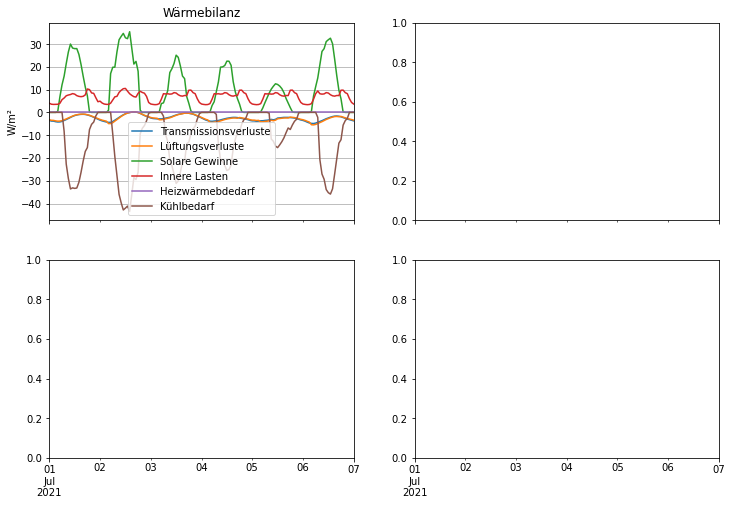

C:\Users\Simon\PycharmProjects\MEE1-3-PEQ\Exercises\solutions\Simulation.py:314: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


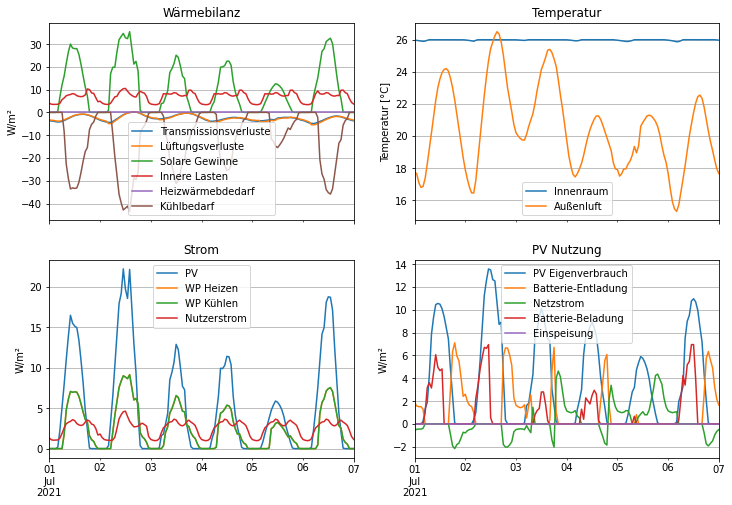

In [8]:
test.plot(start="2021-07-01 00:00:00", end="2021-07-07 00:00:00") 